# Effect of Sex, Race and Relationship on People's Weekly Working Hours

Dansie Feng  
Harry Li  
Vicky Lin

![alt text for screen readers](https://blog.vantagecircle.com/content/images/2019/07/flexible-working-time.png "Text to show on mouseover")

*[1] Picture Originated from Vantage Circle*

## Introduction

According to Lucía Artazcoz, et al, long working hours will severely affect both of people’s physical and mental health with low work efficiency. Nowadays, the fact that this world is filled with countless working opportunities with various working standards has gained our attention towards the working hours that vary between different people due to different reasons. Therefore we decided to use the Adult dataset from the 1944 Census database by Barry Becker to examine how 3 factors: **sex, race, and relationship that affect people's hours per week** out of 14 factors included in the dataset?   

We will use statistical inference techniques, hypothesis testing, bootstrapping methods with error analysis and confidence intervals to find mean and standard deviation. We will use the result to  evaluate and determine the significance of each factor that contributes to working hours, and help people determine the most suitable working hours for different types of people. 

## Preliminary Results

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(cowplot)
library(infer)
library(datateachr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Load Data

We first load the dataset from website to R. We name the dataset `adult`.

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult <- read_csv(url, col_names = F)

head(adult)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


*Table 1.1 The dataset without specific variables name*

### Clean and Wrangle Data

We rename the variables and give each of them a meaningful name.

In [3]:
#Tidy the data

adult_tidy <- adult %>%
    rename(age = X1,
           workclass = X2,
           serial_num = X3,
           education = X4,
          education_num = X5,
          marital_status = X6,
          occupation =X7,
          relationship = X8,
          race =X9, 
          sex =X10,
          capital_gain =X11,
          capital_loss = X12,
          hours_per_week = X13,
          native_country = X14,
          income = X15)

head(adult_tidy)

age,workclass,serial_num,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


*Table 1.2 the dataset with specific variables name*

We want to study how owning children can influence weekly working hours, so we regroup the variable `relationship` into `With Child` and `Without Child` . Then we select the variables `sex`, `race`, `relationship` and `hours_per_week` that we are going to study in this project.

In [4]:
adult_data <- 
    adult_tidy %>%
    mutate(adult_tidy, 
           relationship = ifelse(relationship == "Own-child", "With Child" , "Without Child")) %>%
    select(sex, race, relationship, hours_per_week)

head(adult_data)

sex,race,relationship,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Male,White,Without Child,40
Male,White,Without Child,13
Male,White,Without Child,40
Male,Black,Without Child,40
Female,Black,Without Child,40
Female,White,Without Child,40


*Table 1.3 the dataset with columns we need in the question*

### View Data Visually

We use a boxplot to demonstrate the relationship between `sex` and `hours_per_week`.

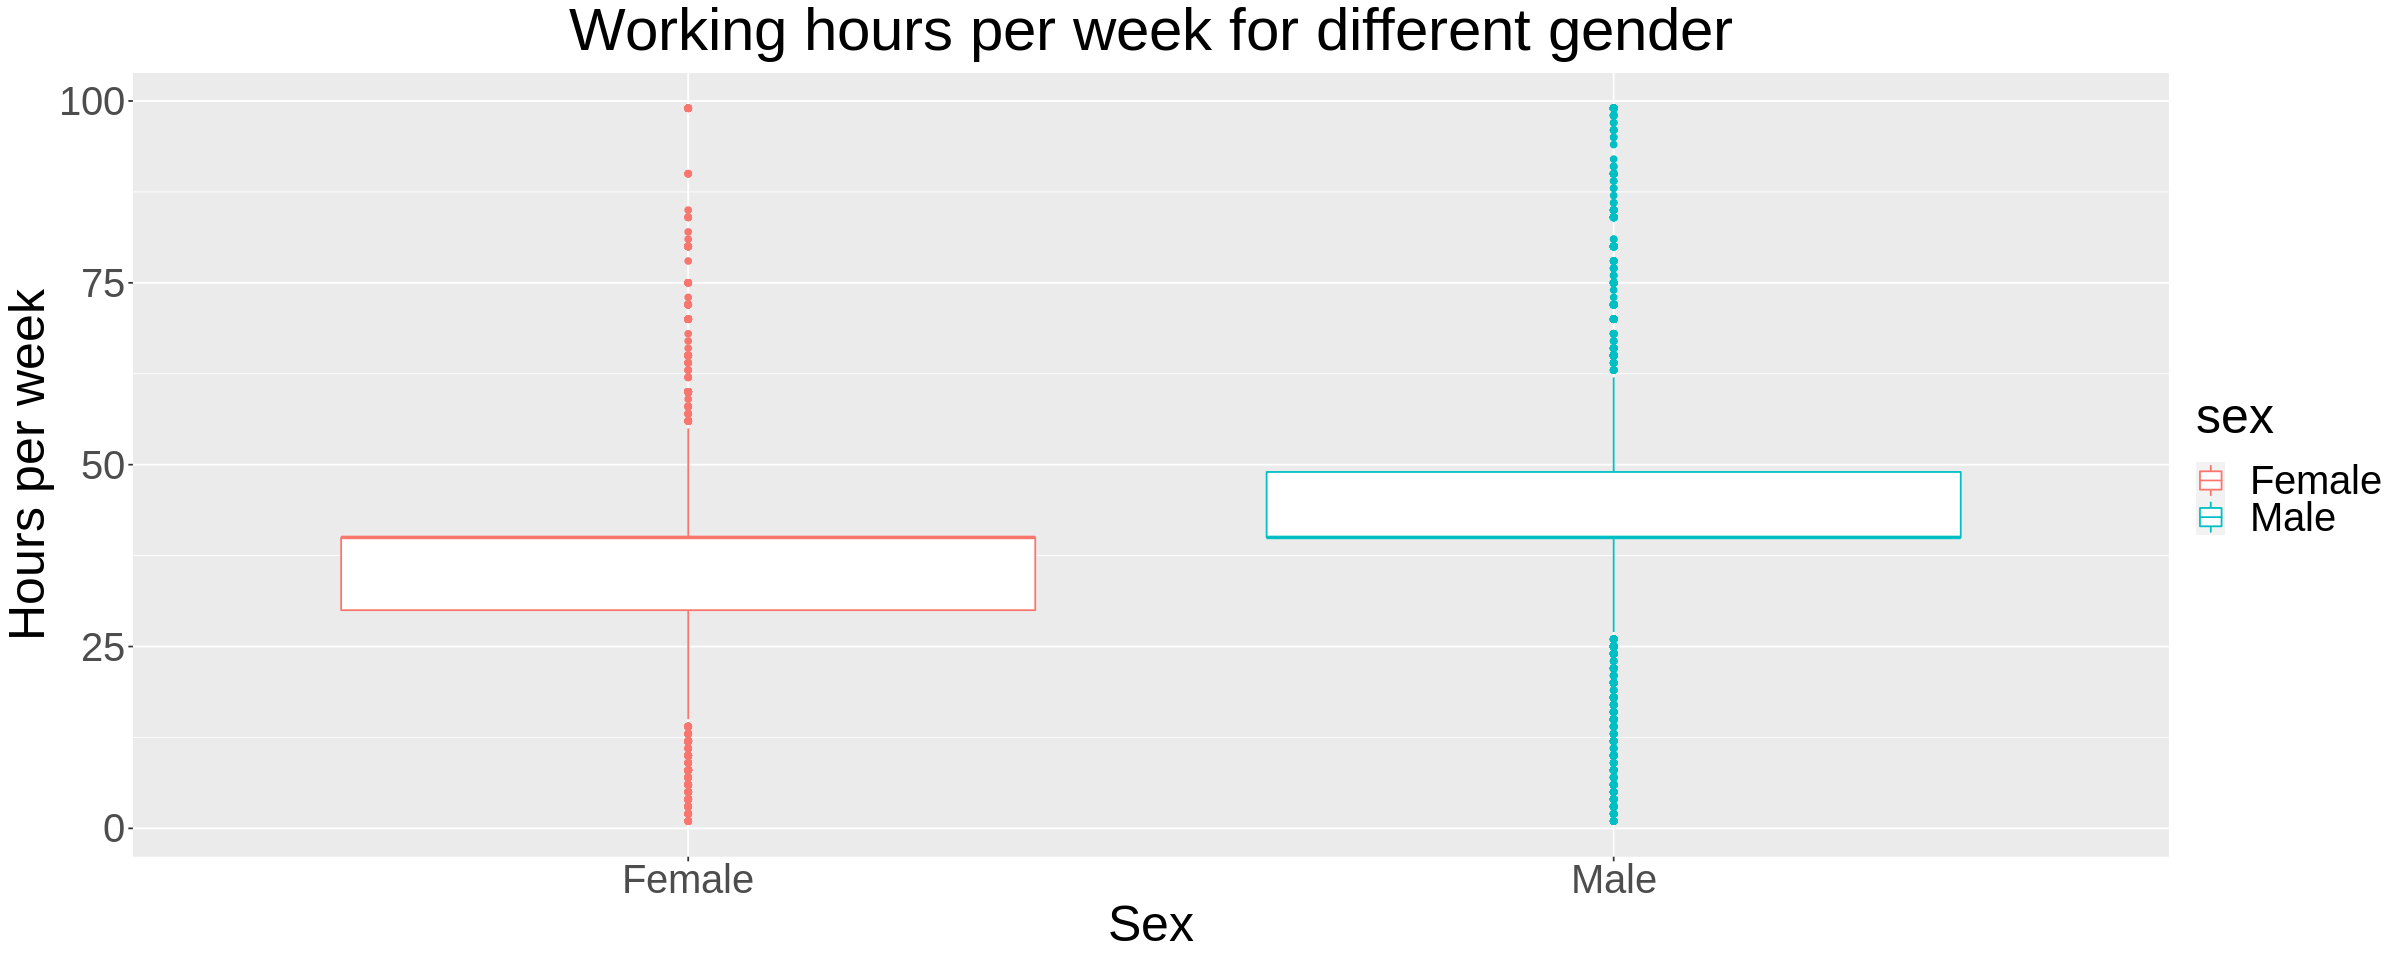

In [5]:
sex_hpw_plot <- 
    adult_data %>%
    ggplot(aes(x = sex, y = hours_per_week, color = sex)) +
    geom_boxplot() +
    labs(x = "Sex", y = "Hours per week") +
    ggtitle("Working hours per week for different gender") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

sex_hpw_plot

*Figure 1.1 working hours per week for different gender*

We use a boxplot to demonstrate the relationship between `race` and `hours_per_week`.

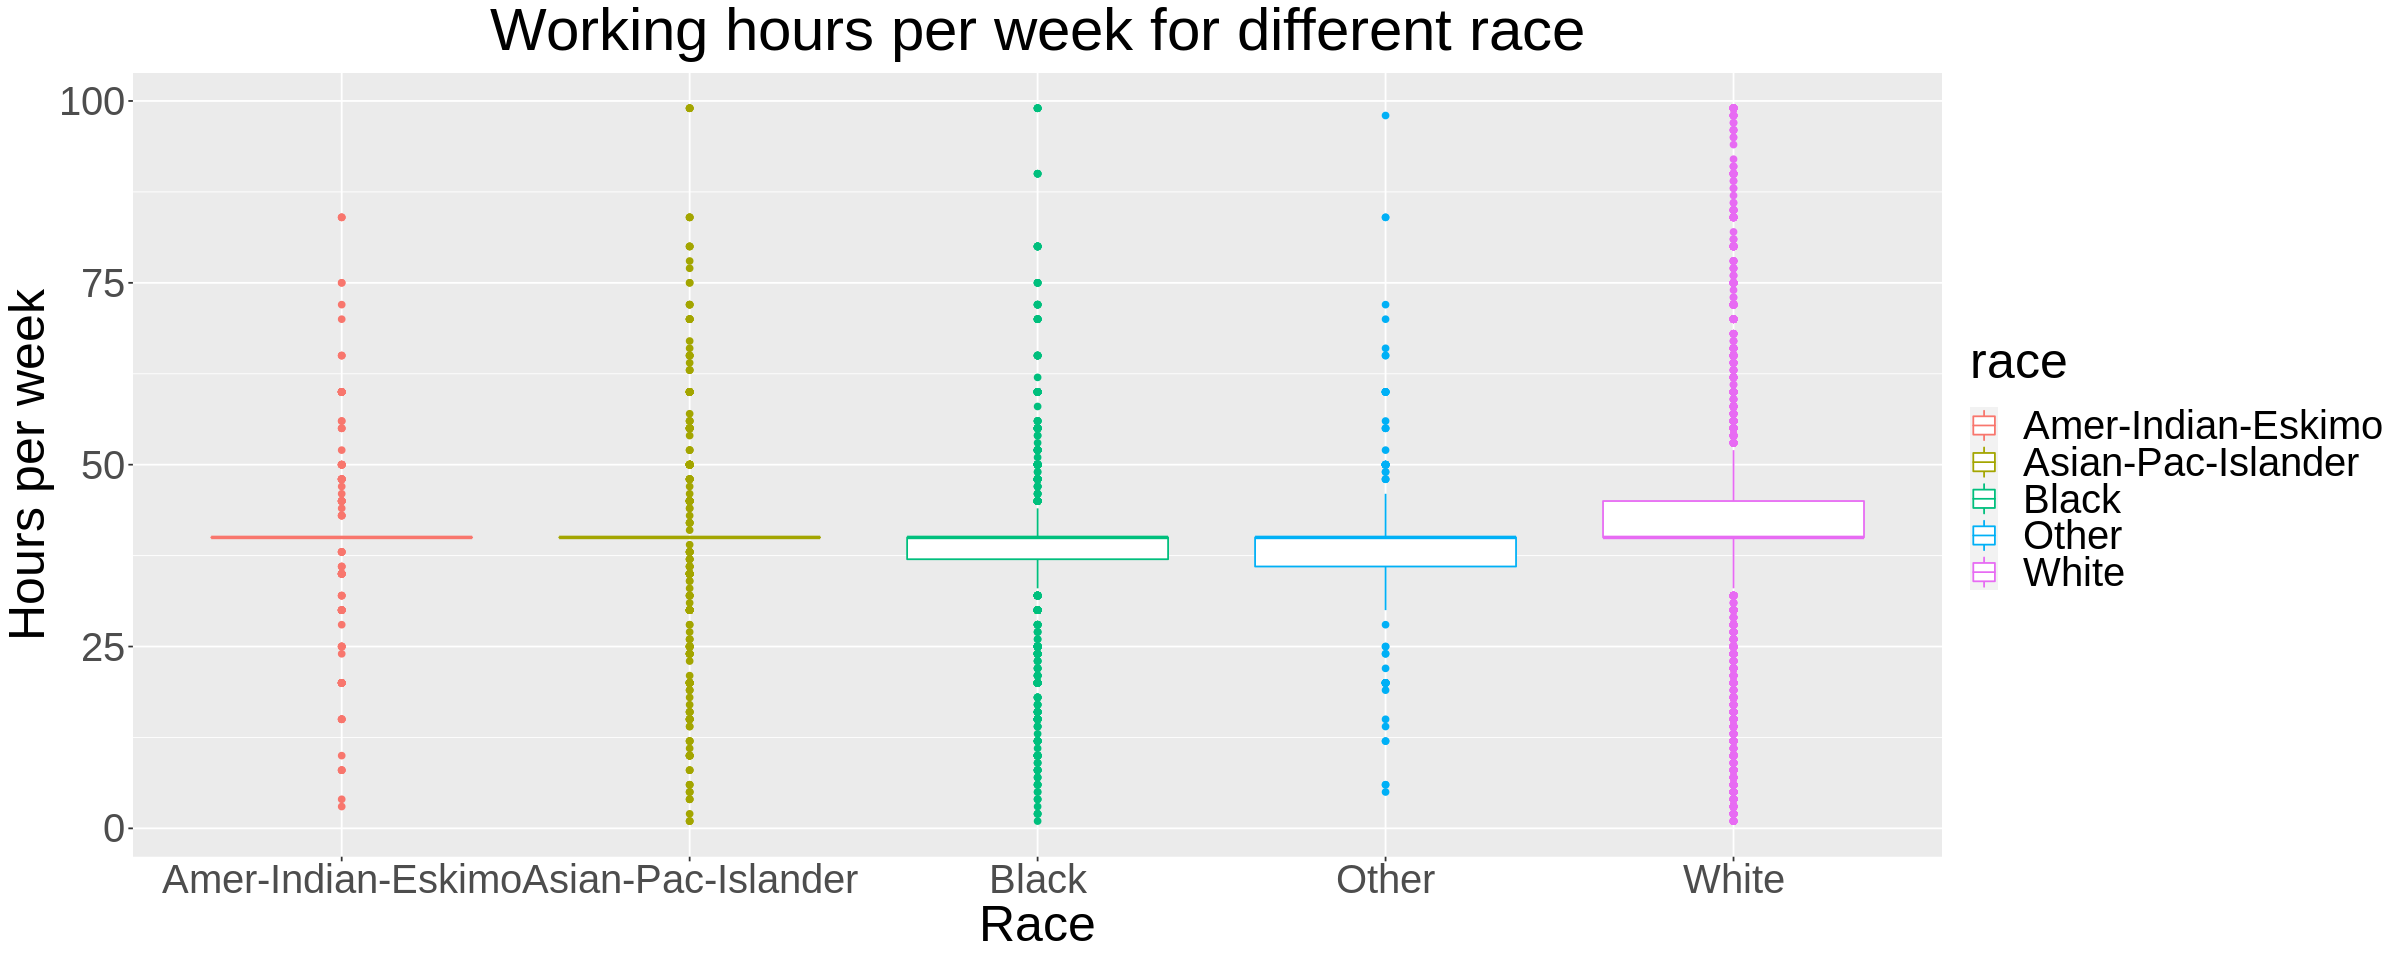

In [6]:
race_hpw_plot <- 
    adult_data %>%
    ggplot(aes(x = race, y = hours_per_week, color = race)) +
    geom_boxplot() +
    labs(x = "Race", y = "Hours per week") +
    ggtitle("Working hours per week for different race") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

race_hpw_plot

*Figure 1.2 Working hours per week for different race*

We use a boxplot to demonstrate the relationship between `relationship` and `hours_per_week`.

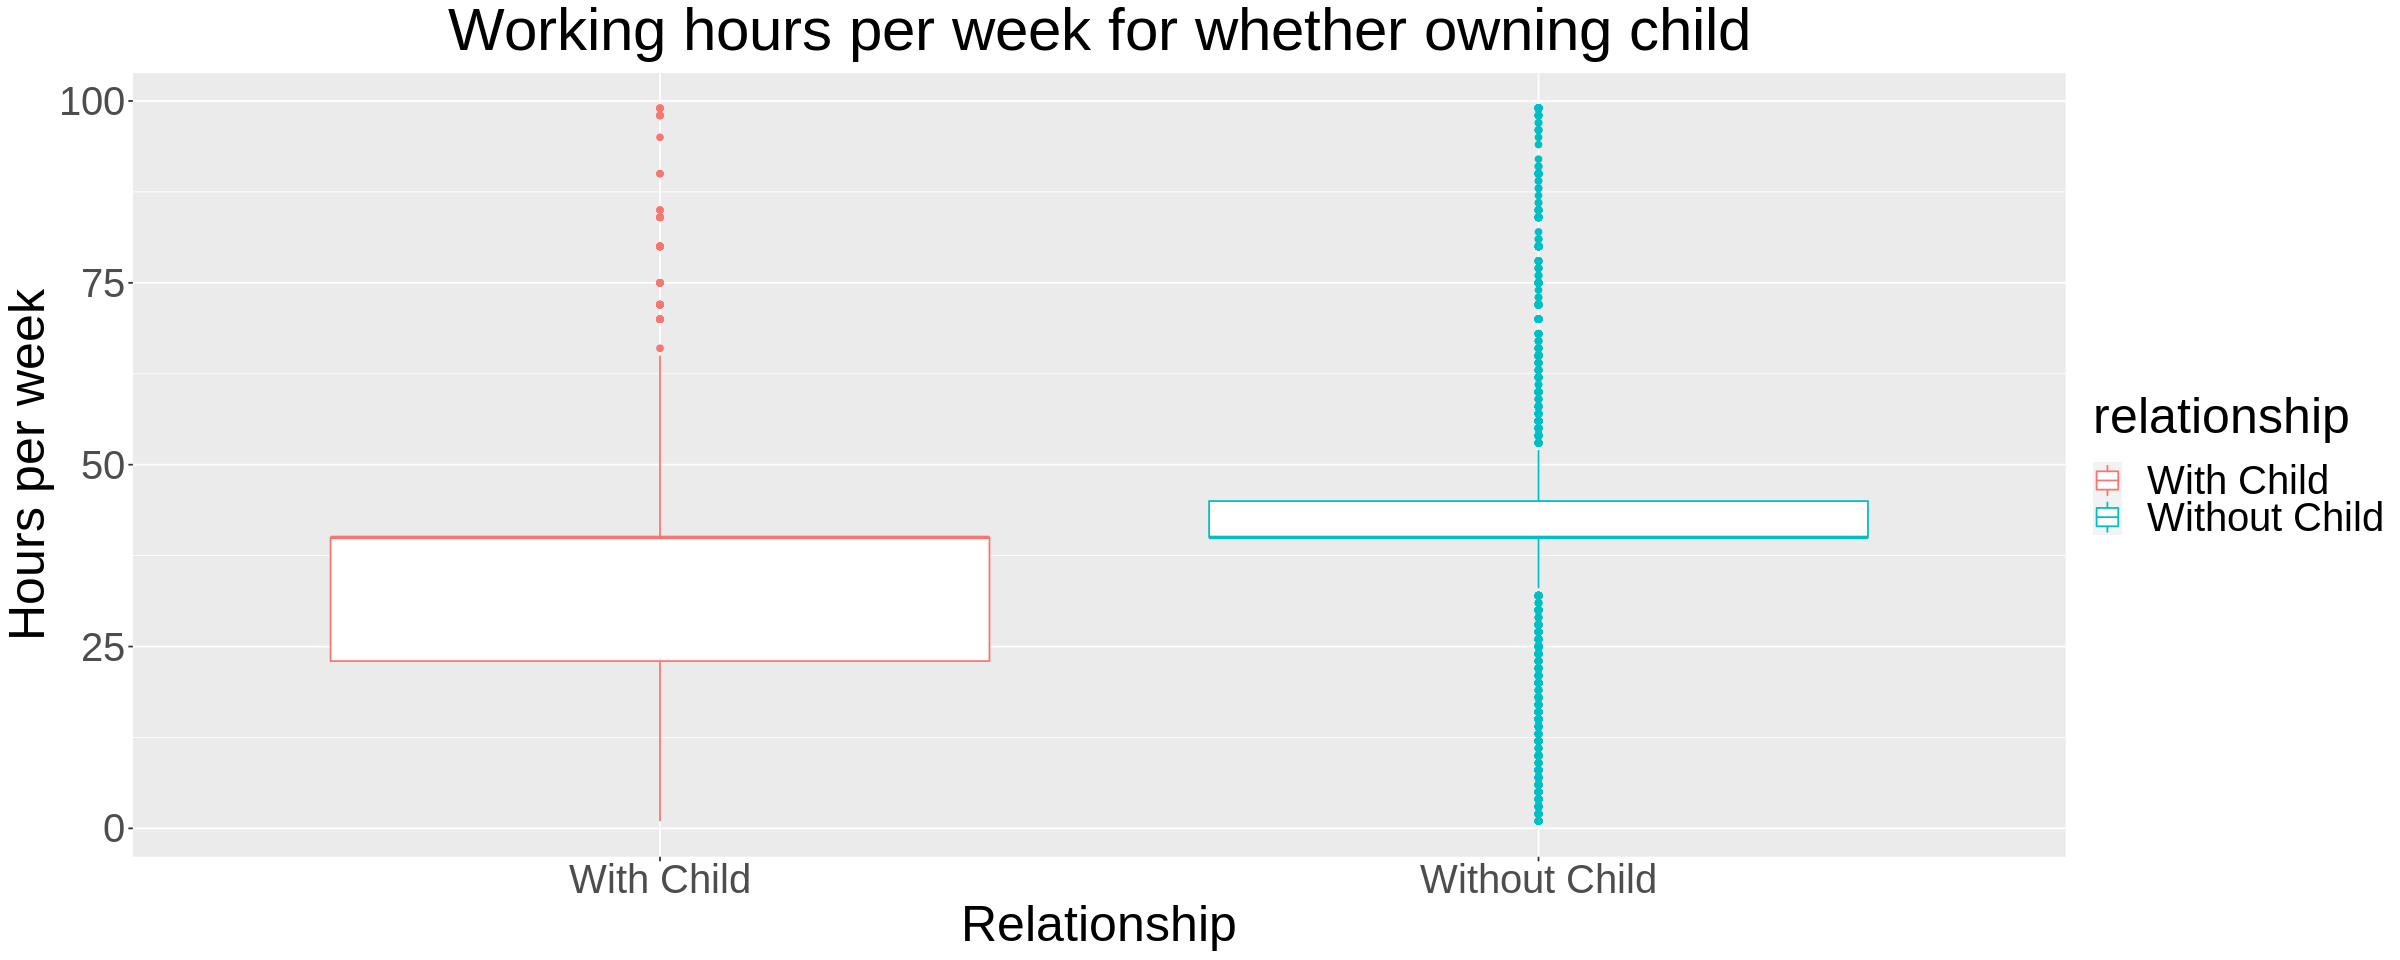

In [7]:
relationship_hpw_plot <- 
    adult_data %>%
    ggplot(aes(x = relationship, y = hours_per_week, color = relationship)) +
    geom_boxplot() +
    labs(x = "Relationship", y = "Hours per week") +
    ggtitle("Working hours per week for whether owning child") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

relationship_hpw_plot

*Figure 1.3 Working hours per week for whether owning child*

We also need a histogram to show the distribution of working hours per week.

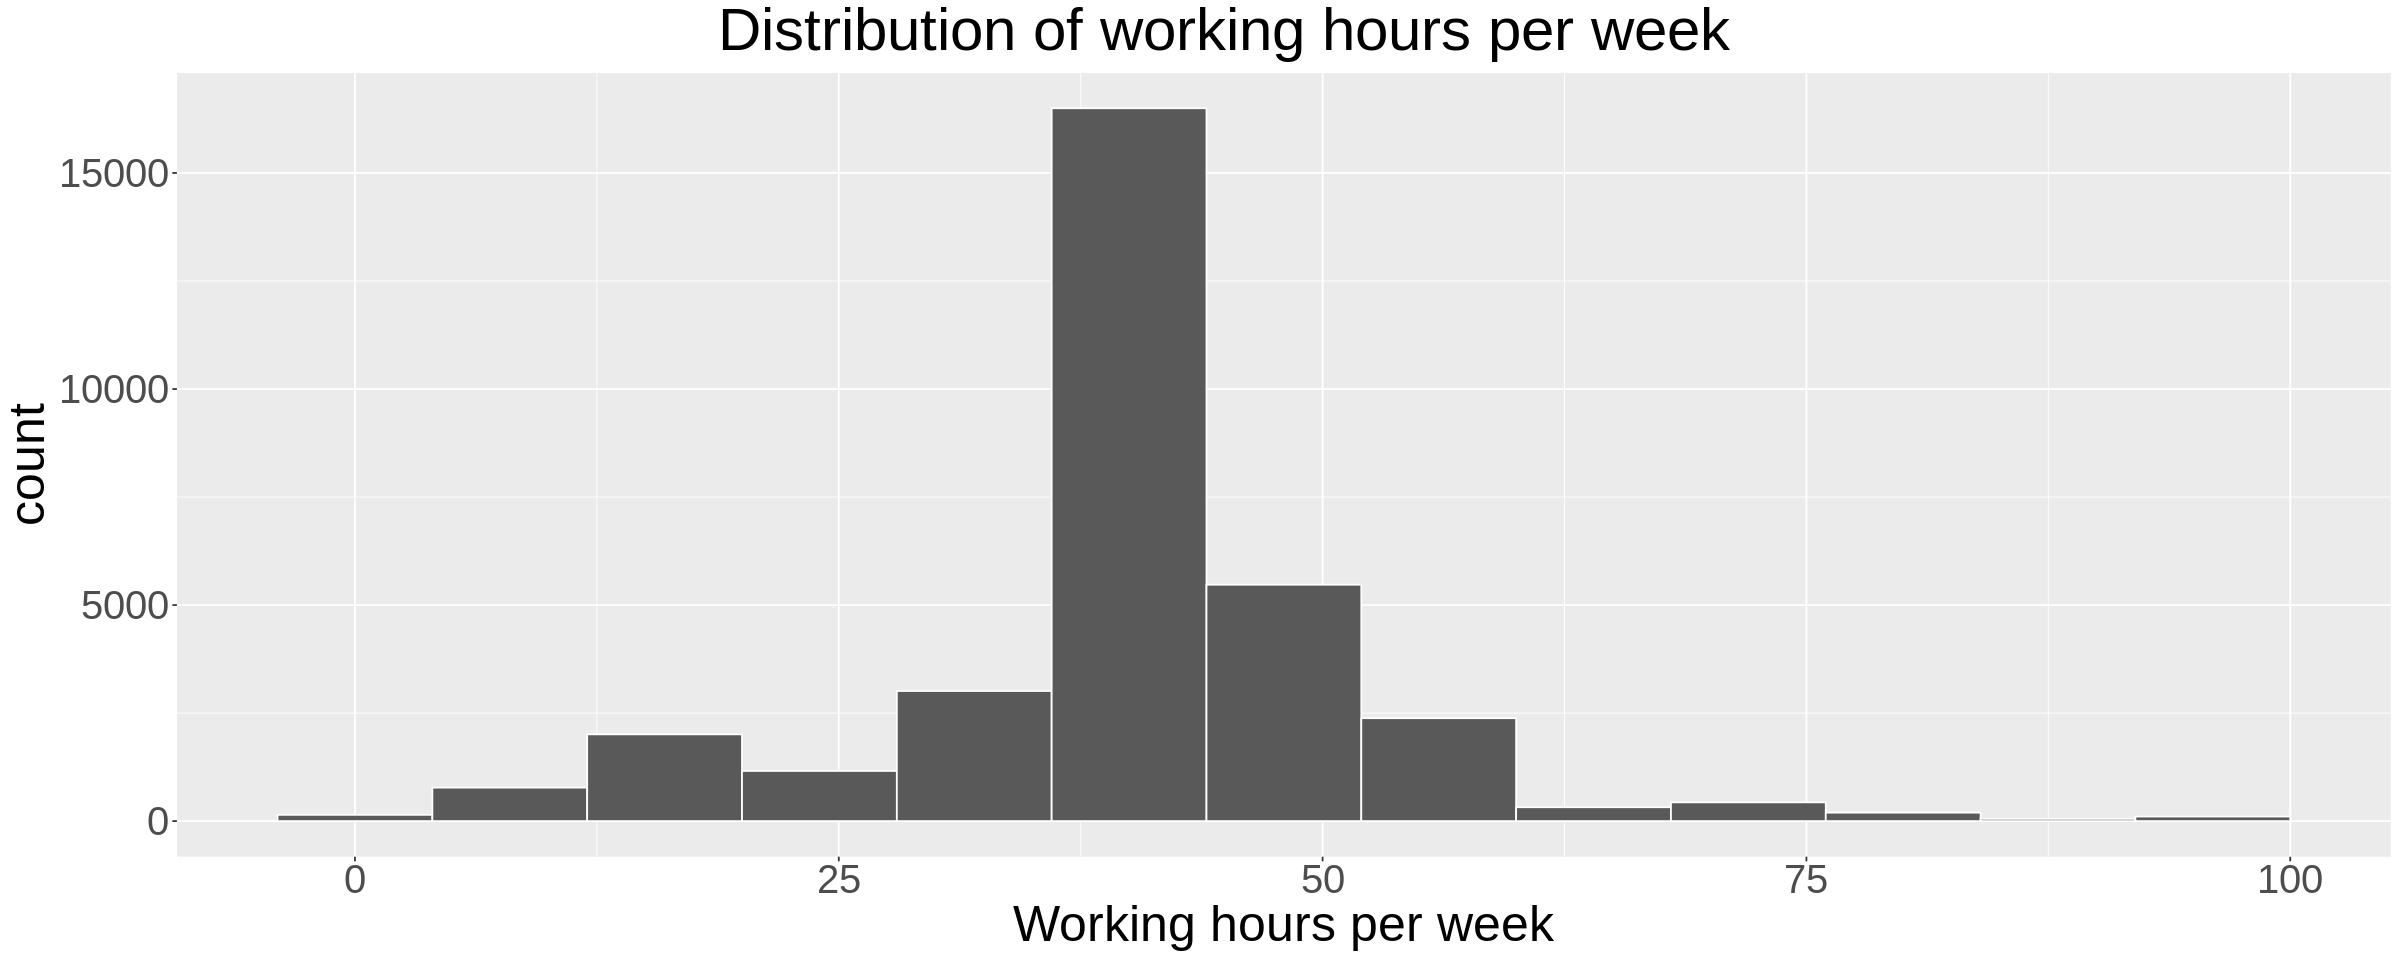

In [8]:
hpw_dist <-
    adult_data %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 8, color = "white") +
    labs(x = "Working hours per week") +
    ggtitle("Distribution of working hours per week") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.45))

options(repr.plot.width = 20, repr.plot.height = 8)

hpw_dist

*Figure 1.4 Distribution of working hours per week*

### Statistics of Data

We compute the mean and standard deviation of working hours per week based on gender.

In [9]:
sex_hpw <- 
    adult_data %>%
    select(sex, hours_per_week) %>%
    group_by(sex) %>%
    summarize(mean = mean(hours_per_week),
              sd = sd(hours_per_week))

sex_hpw

sex,mean,sd
<chr>,<dbl>,<dbl>
Female,36.41036,11.81130
Male,42.42809,12.11976


*Table 1.4 the mean and standard deviation of working hours per week based on gender*

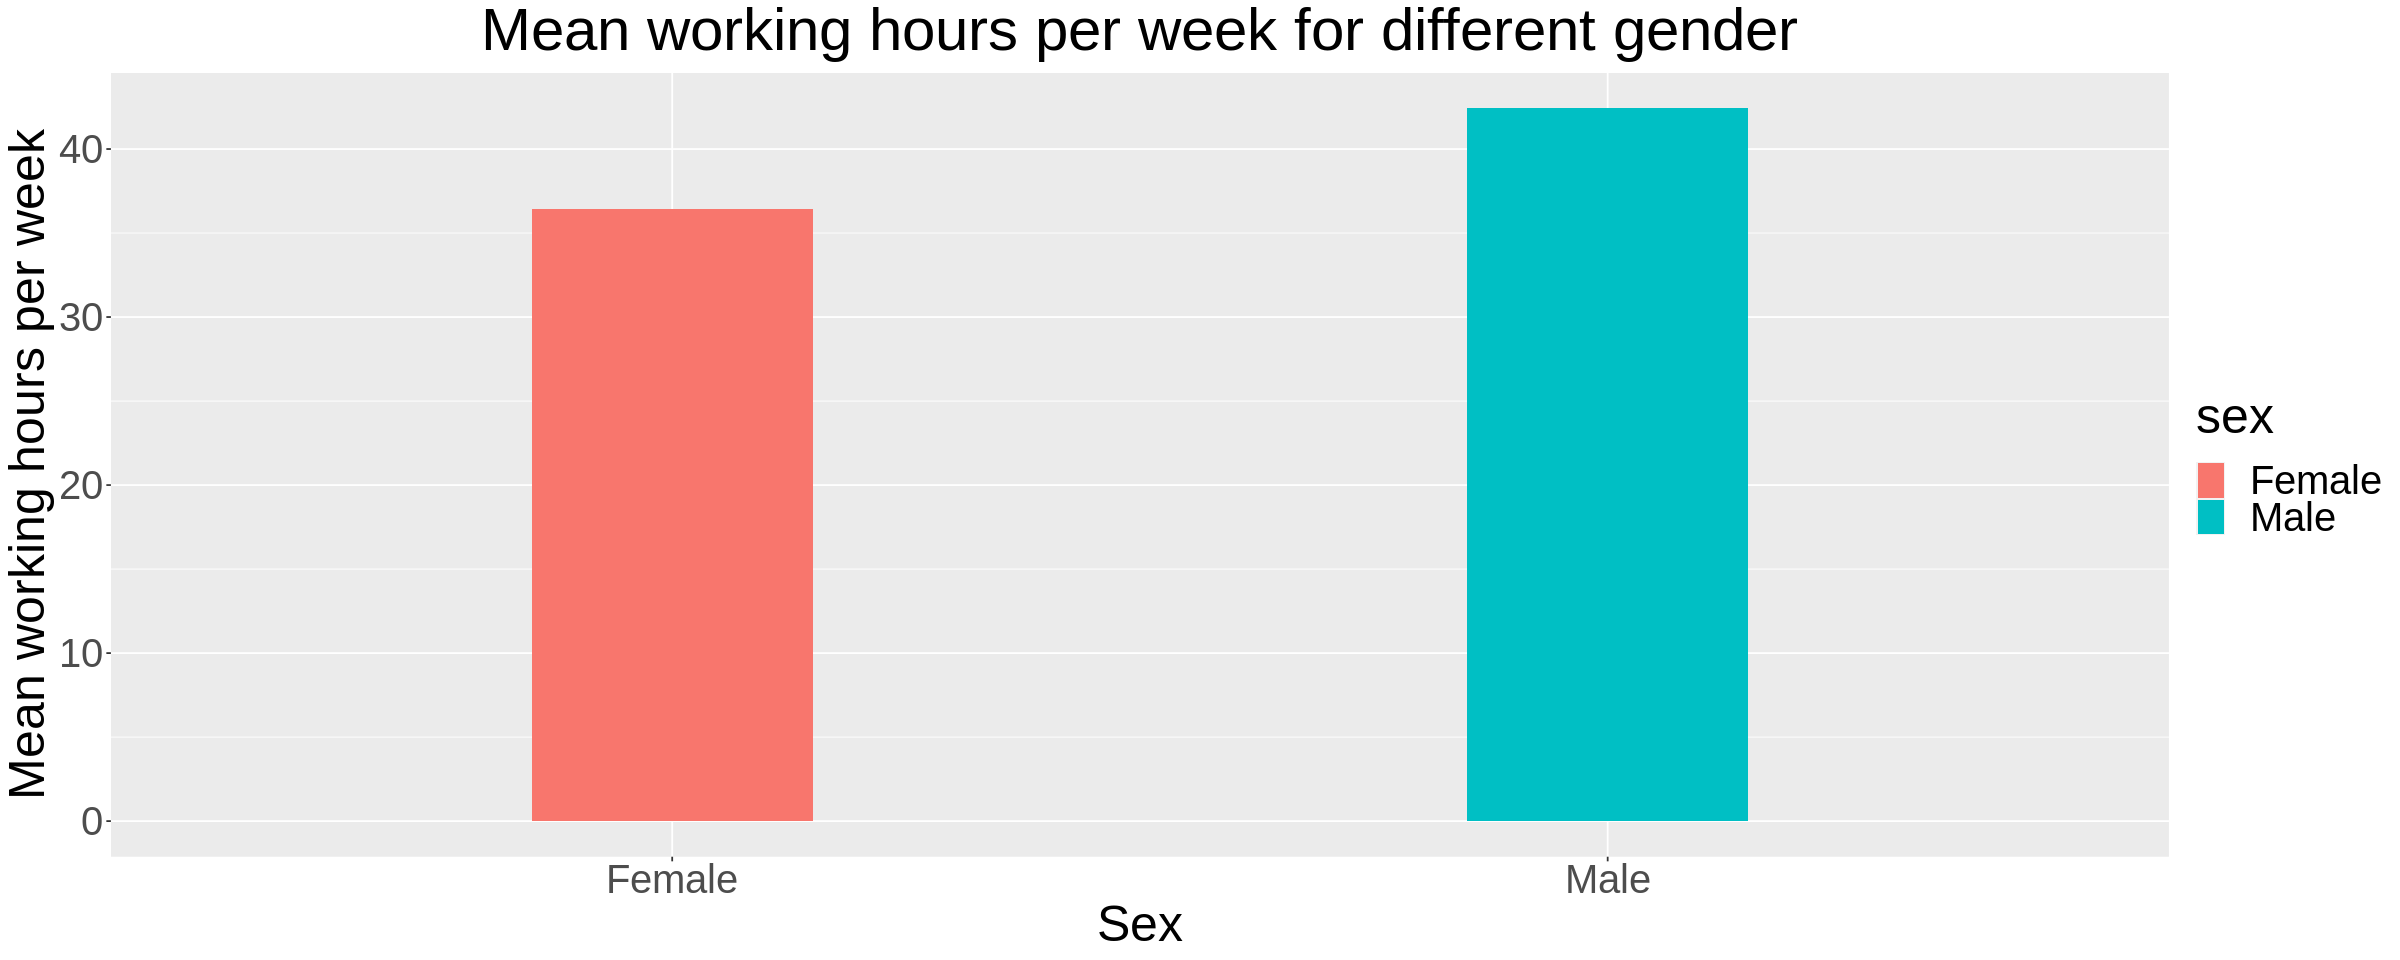

In [10]:
sex_hpw_mean_plot <- 
    sex_hpw %>%
    ggplot(aes(x = sex, y = mean, fill = sex)) +
    geom_bar(stat = "identity", width = 0.3) +
    labs(x = "Sex", y = "Mean working hours per week") +
    ggtitle("Mean working hours per week for different gender") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

sex_hpw_mean_plot

*Figure 1.5 Mean working hours per week for different gender*

We compute the mean and standard deviation of working hours per week based on race.

In [11]:
race_hpw <- 
    adult_data %>%
    select(race, hours_per_week) %>%
    group_by(race) %>%
    summarize(mean = mean(hours_per_week),
             sd = sd(hours_per_week))

race_hpw

race,mean,sd
<chr>,<dbl>,<dbl>
Amer-Indian-Eskimo,40.04823,11.69536
Asian-Pac-Islander,40.12705,12.55682
Black,38.42286,10.31565
Other,39.46863,11.14375
White,40.68910,12.54480


*Table 1.5 the mean and standard deviation of working hours per week based on race*

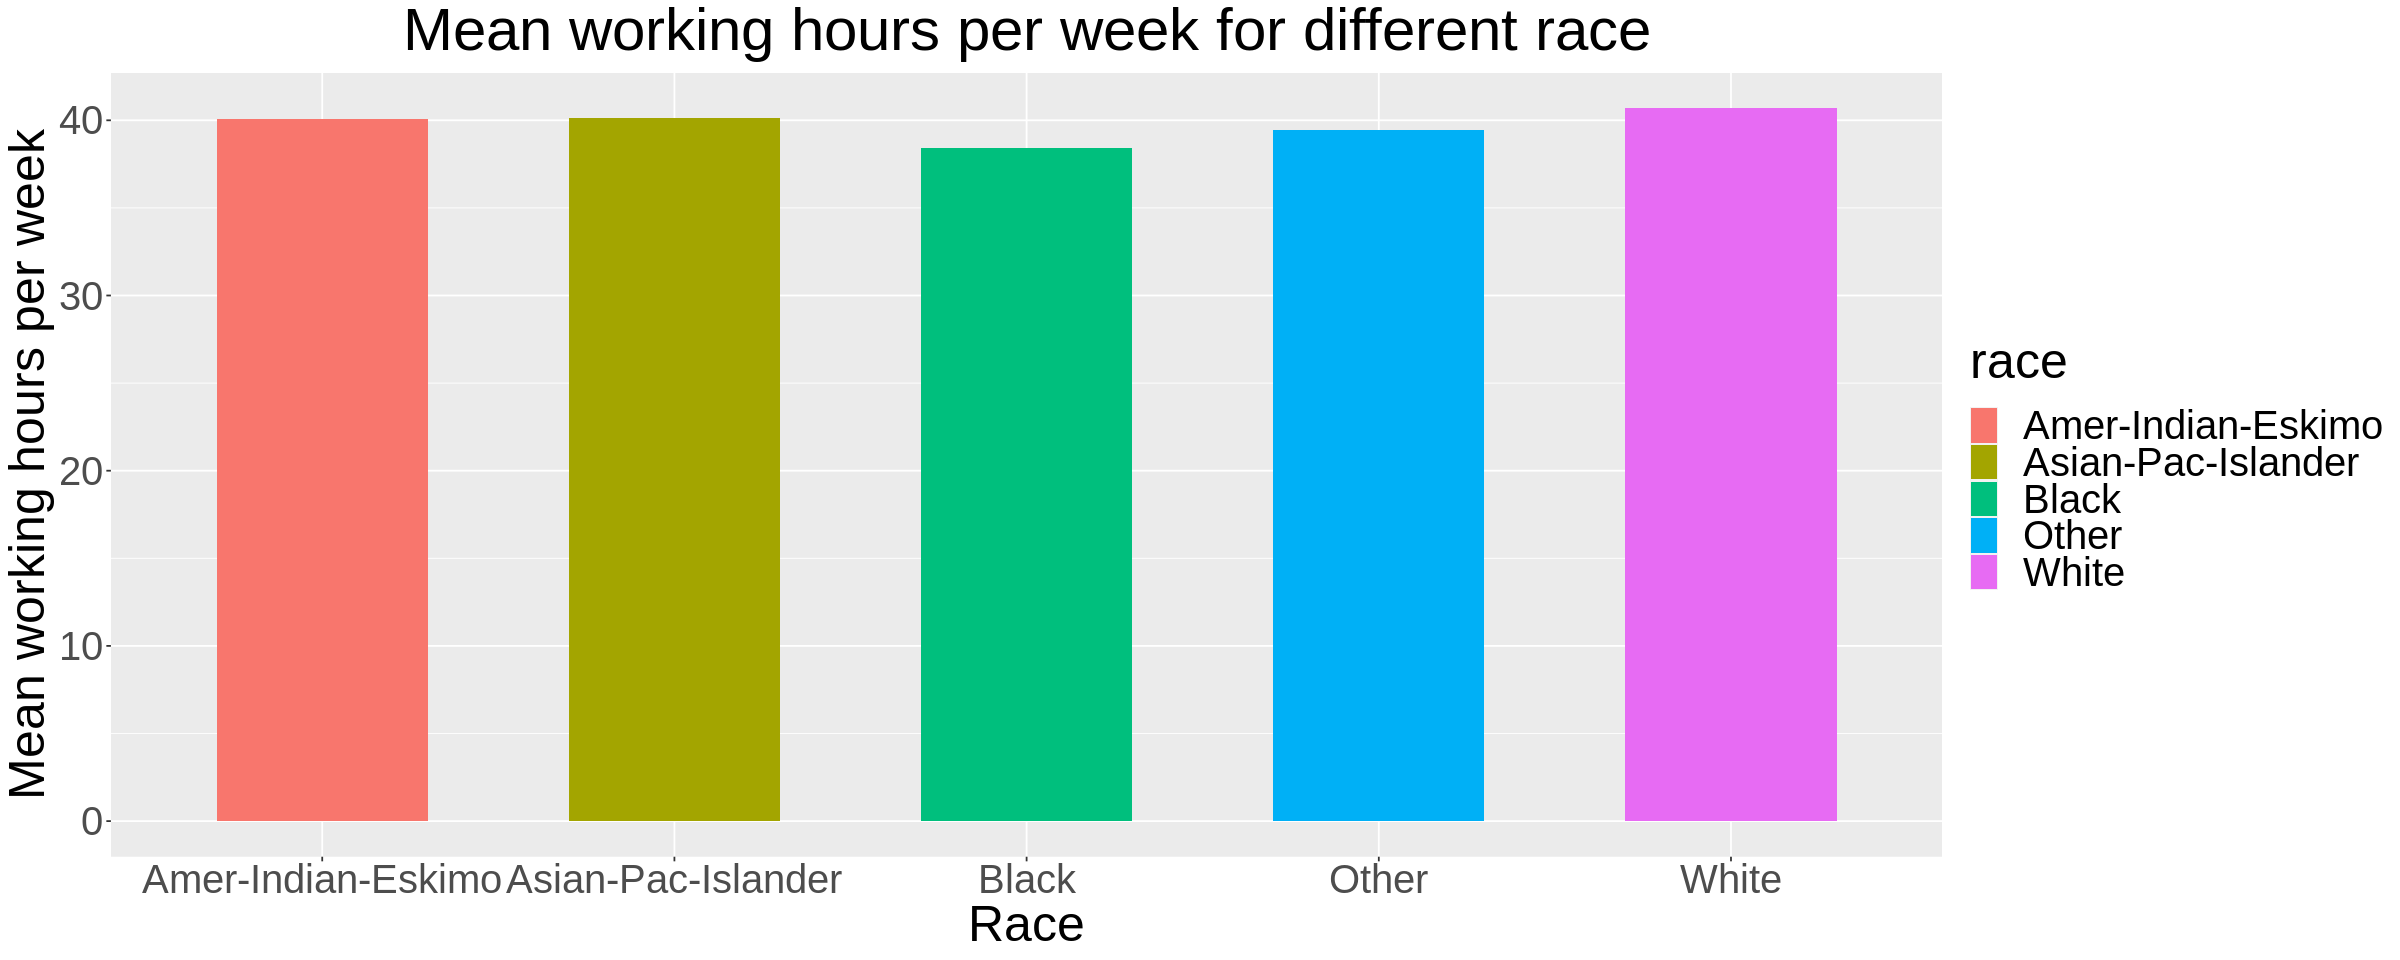

In [12]:
race_hpw_mean_plot <- 
    race_hpw %>%
    ggplot(aes(x = race, y = mean, fill = race)) +
    geom_bar(stat = "identity", width = 0.6) +
    labs(x = "Race", y = "Mean working hours per week") +
    ggtitle("Mean working hours per week for different race") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

race_hpw_mean_plot

*Figure 1.6 Mean working hours per week for different race*

We compute the mean and standard deviation of working hours per week based on relationship.

In [13]:
relationship_hpw <-
    adult_data %>%
    select(relationship, hours_per_week) %>%
    group_by(relationship) %>%
    summarize(mean = mean(hours_per_week),
             sd = sd(hours_per_week))

relationship_hpw

relationship,mean,sd
<chr>,<dbl>,<dbl>
With Child,33.26934,12.76535
Without Child,41.75881,11.80306


*Table 1.6 the mean and standard deviation of working hours per week based on relationship*

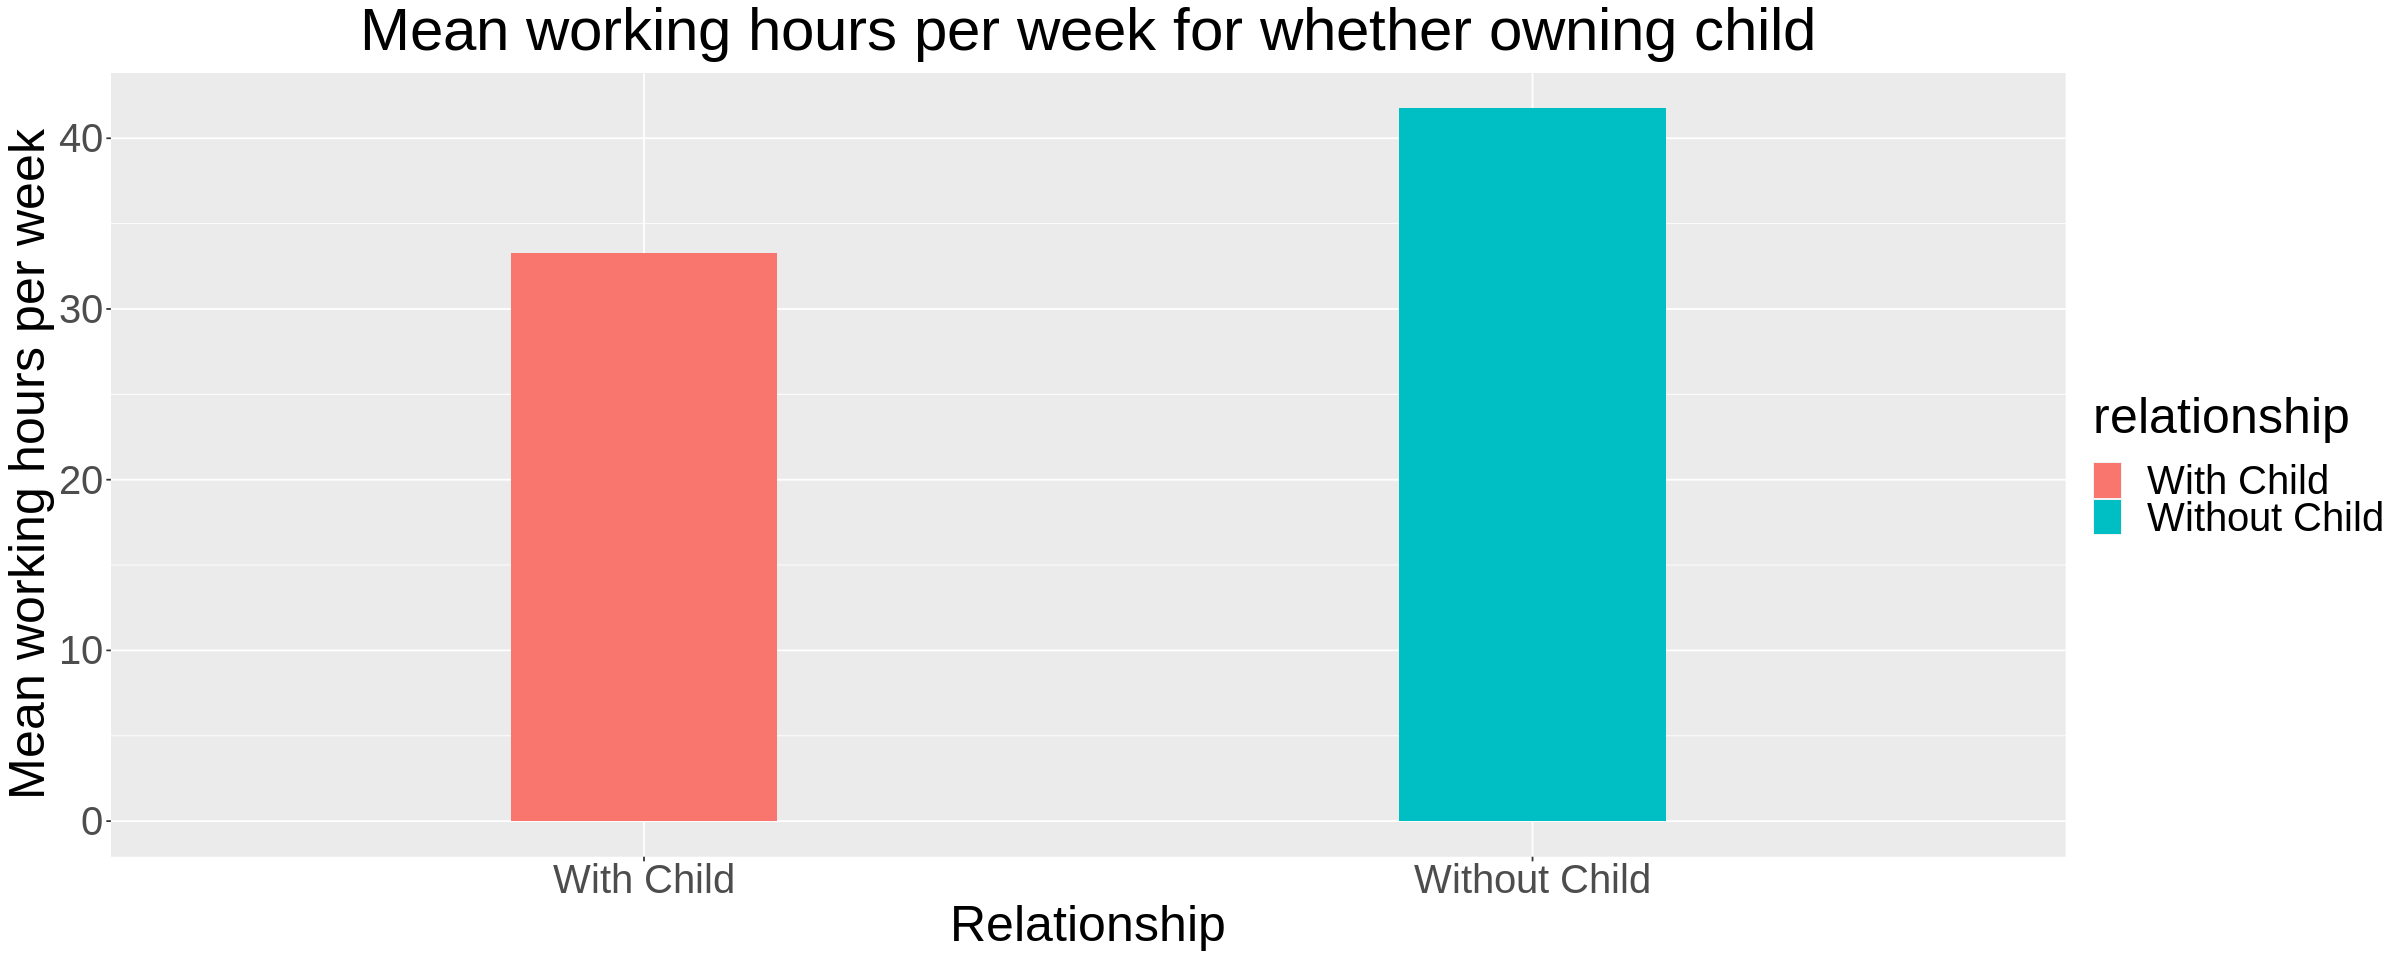

In [14]:
relationship_hpw_mean_plot <- 
    relationship_hpw %>%
    ggplot(aes(x = relationship, y = mean, fill = relationship)) +
    geom_bar(stat = "identity", width = 0.3) +
    labs(x = "Relationship", y = "Mean working hours per week") +
    ggtitle("Mean working hours per week for whether owning child") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

relationship_hpw_mean_plot

*Figure 1.7 Mean working hours per week for whether owning child*

## Method: Plan

**Trustworthiness**
- The Adult dataset we retrieved is from the 1944 Census Database extracted by Barry Becker. 
- The Adult dataset is authentic and unbiased, as it recorded many key factors that affect the working hours.
- Scientific method of statistical inference, bootstrapping, and hypothesis being used to ensure accurate examination and result. 
- Very generalized, well covered datasets with more than 30000 observations that covered nearly all the outliers and unexpected cases. 


**Some imperfection of plots & Estimates**

- It includes too many variables, therefore might affect the people to achieve a clear visualization and relationship between the factors that affect the working hours. 
- The plots seem to contain too many outliers, as it will affect the visualization. 
- Some relationship, such as race might not have an obvious relationship between the working hours
- In addition, since the race test’s observation is not too obvious, we can use the hypothesis to quantify the variables, as it is a more reliable measure of the relationship between race and working hours. 

**Hypothesis Test**

$H_0$: The mean working hours for the family owning a child is the same as the mean working hours for the family without a child.

$H_1$: The mean working hours for the family owning a child is less than the mean working hours for the family without a child.

In [15]:
set.seed(50)

sample <- 
    adult_data %>%
    select(relationship, hours_per_week) %>%
    rep_sample_n(size = 500, reps = 1, replace = F)

obs_stat <-
    sample %>%
    specify(formula = hours_per_week ~ relationship) %>%
    calculate(stat = "diff in means", order = c("With Child", "Without Child"))

obs_stat

null_model <- 
    sample %>%
    specify(formula = hours_per_week ~ relationship) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("With Child", "Without Child"))
    
head(null_model)

stat
<dbl>
-5.228575


replicate,stat
<int>,<dbl>
1,1.1756974
2,0.9329699
3,2.5387057
4,1.4931103
5,-1.6623474
6,1.3624108


*Table 1.7 Diifference in means under null model*

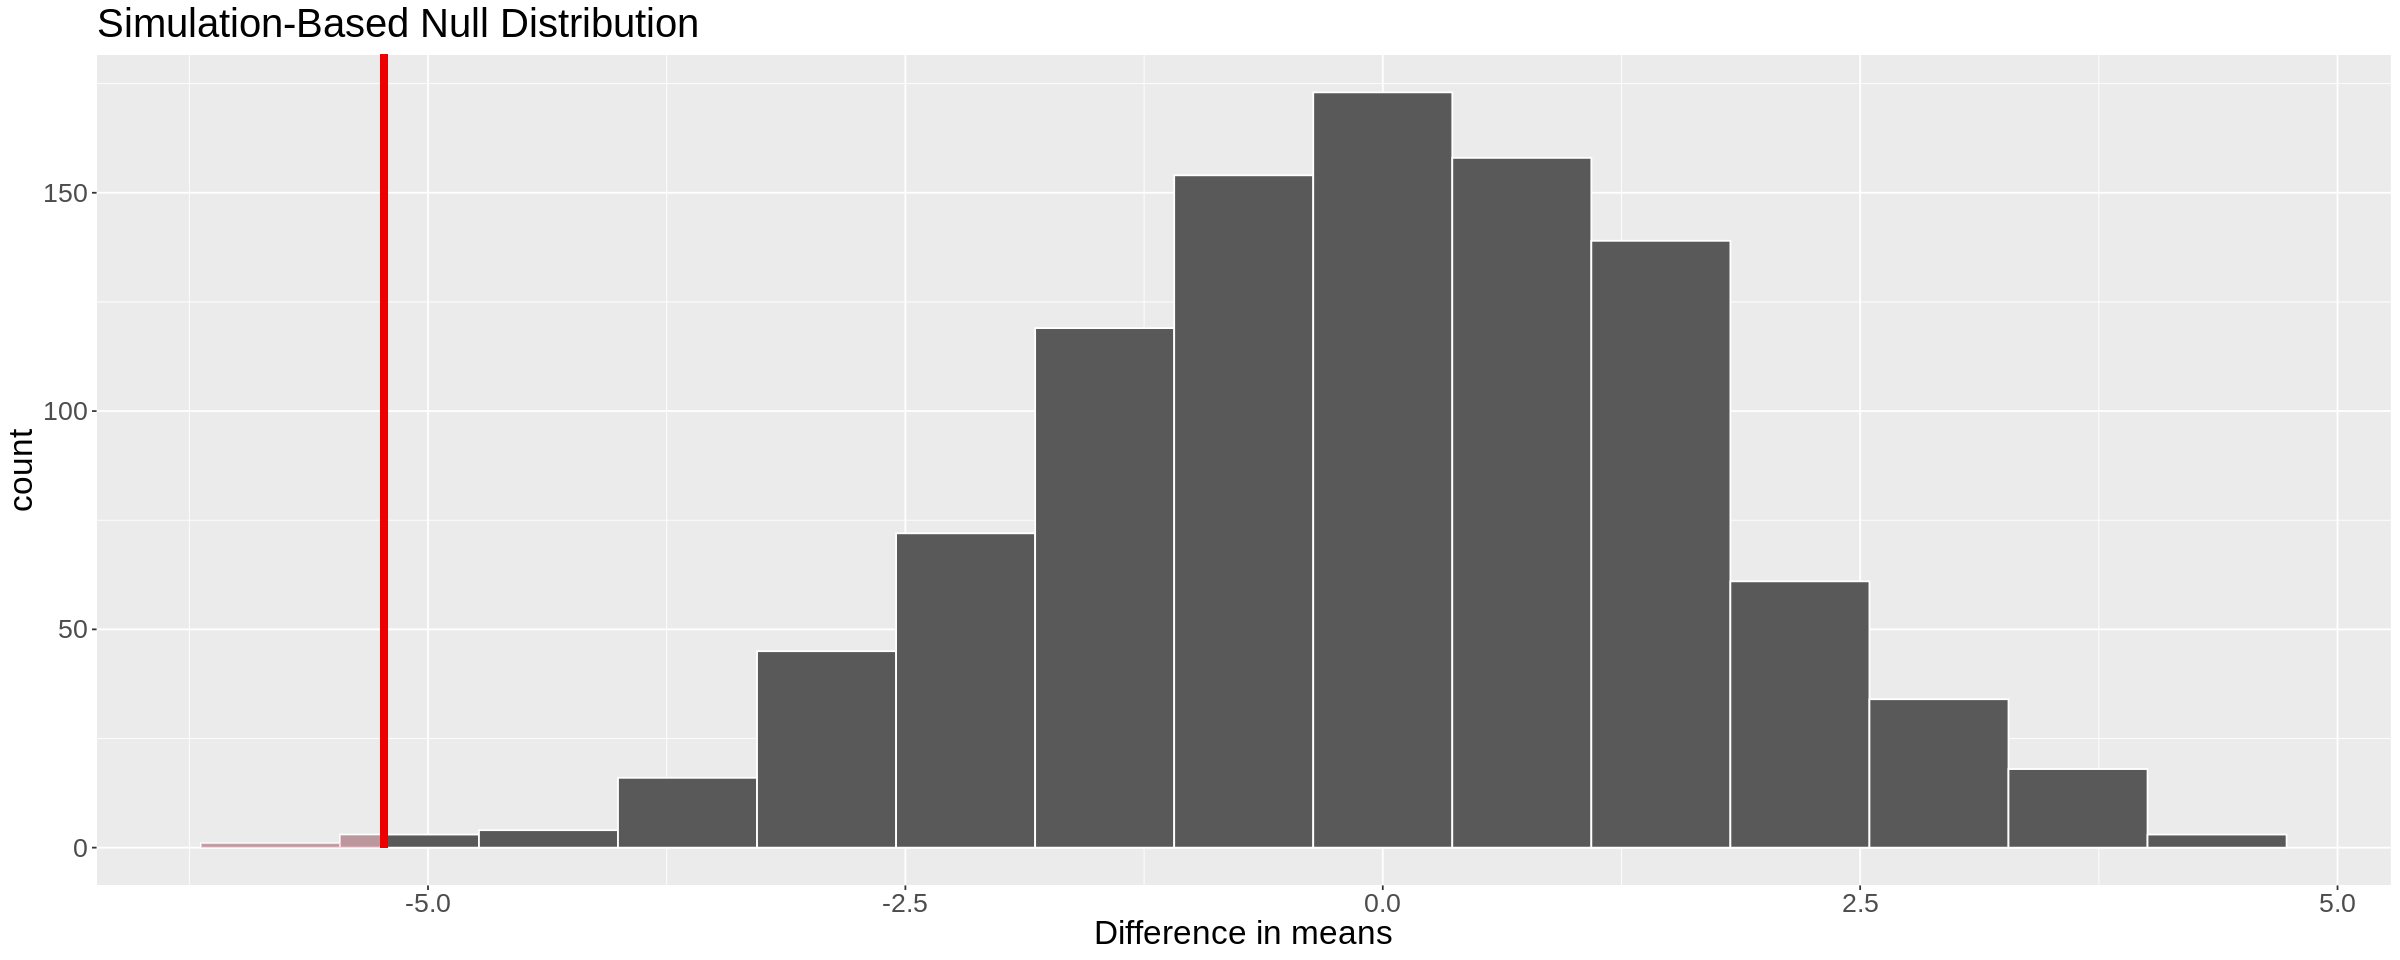

In [16]:
result_plot <- 
    null_model %>%
    visualize() +
    xlab("Difference in means") +
    shade_p_value(obs_stat = obs_stat$stat, direction = "left") +
    theme(text = element_text(size = 20))

result_plot

*Figure 1.8 plot of null distribution*

In [17]:
p_value <- 
    null_model %>%
    get_p_value(obs_stat = obs_stat$stat, direction = "left") %>%
    pull()

p_value

[1] 0.001

**Confidence interval**

In [18]:
set.seed(50)

sample <- 
    adult_data %>%
    select(relationship, hours_per_week) %>%
    rep_sample_n(size = 500, reps = 1, replace = F)

bootstrapping_with_child <- 
    sample %>%
    filter(relationship == "With Child") %>%
    specify(response = hours_per_week) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean") 

bootstrapping_with_child_ci <- 
    bootstrapping_with_child %>%
    get_confidence_interval(level = 0.95, type = "percentile")

bootstrapping_with_child_ci

bootstrapping_without_child <- 
    sample %>%
    filter(relationship == "Without Child") %>%
    specify(response = hours_per_week) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")  

bootstrapping_without_child_ci <-
    bootstrapping_without_child %>%
    get_confidence_interval(level = 0.95, type = "percentile")

bootstrapping_without_child_ci

bootstrapping_diff_in_mean <-
    sample %>%
    specify(formula = hours_per_week ~ relationship) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("With Child", "Without Child"))

bootstrapping_diff_in_mean_ci <-
    bootstrapping_diff_in_mean %>%
        get_confidence_interval(level = 0.95, type = "percentile")

bootstrapping_diff_in_mean_ci

lower_ci,upper_ci
<dbl>,<dbl>
33.52049,40.2791


lower_ci,upper_ci
<dbl>,<dbl>
40.82227,43.07301


lower_ci,upper_ci
<dbl>,<dbl>
-8.698894,-1.812519


*Table 1.8 upper and lower quantile for bootstrap distribution with, without child and difference in means*

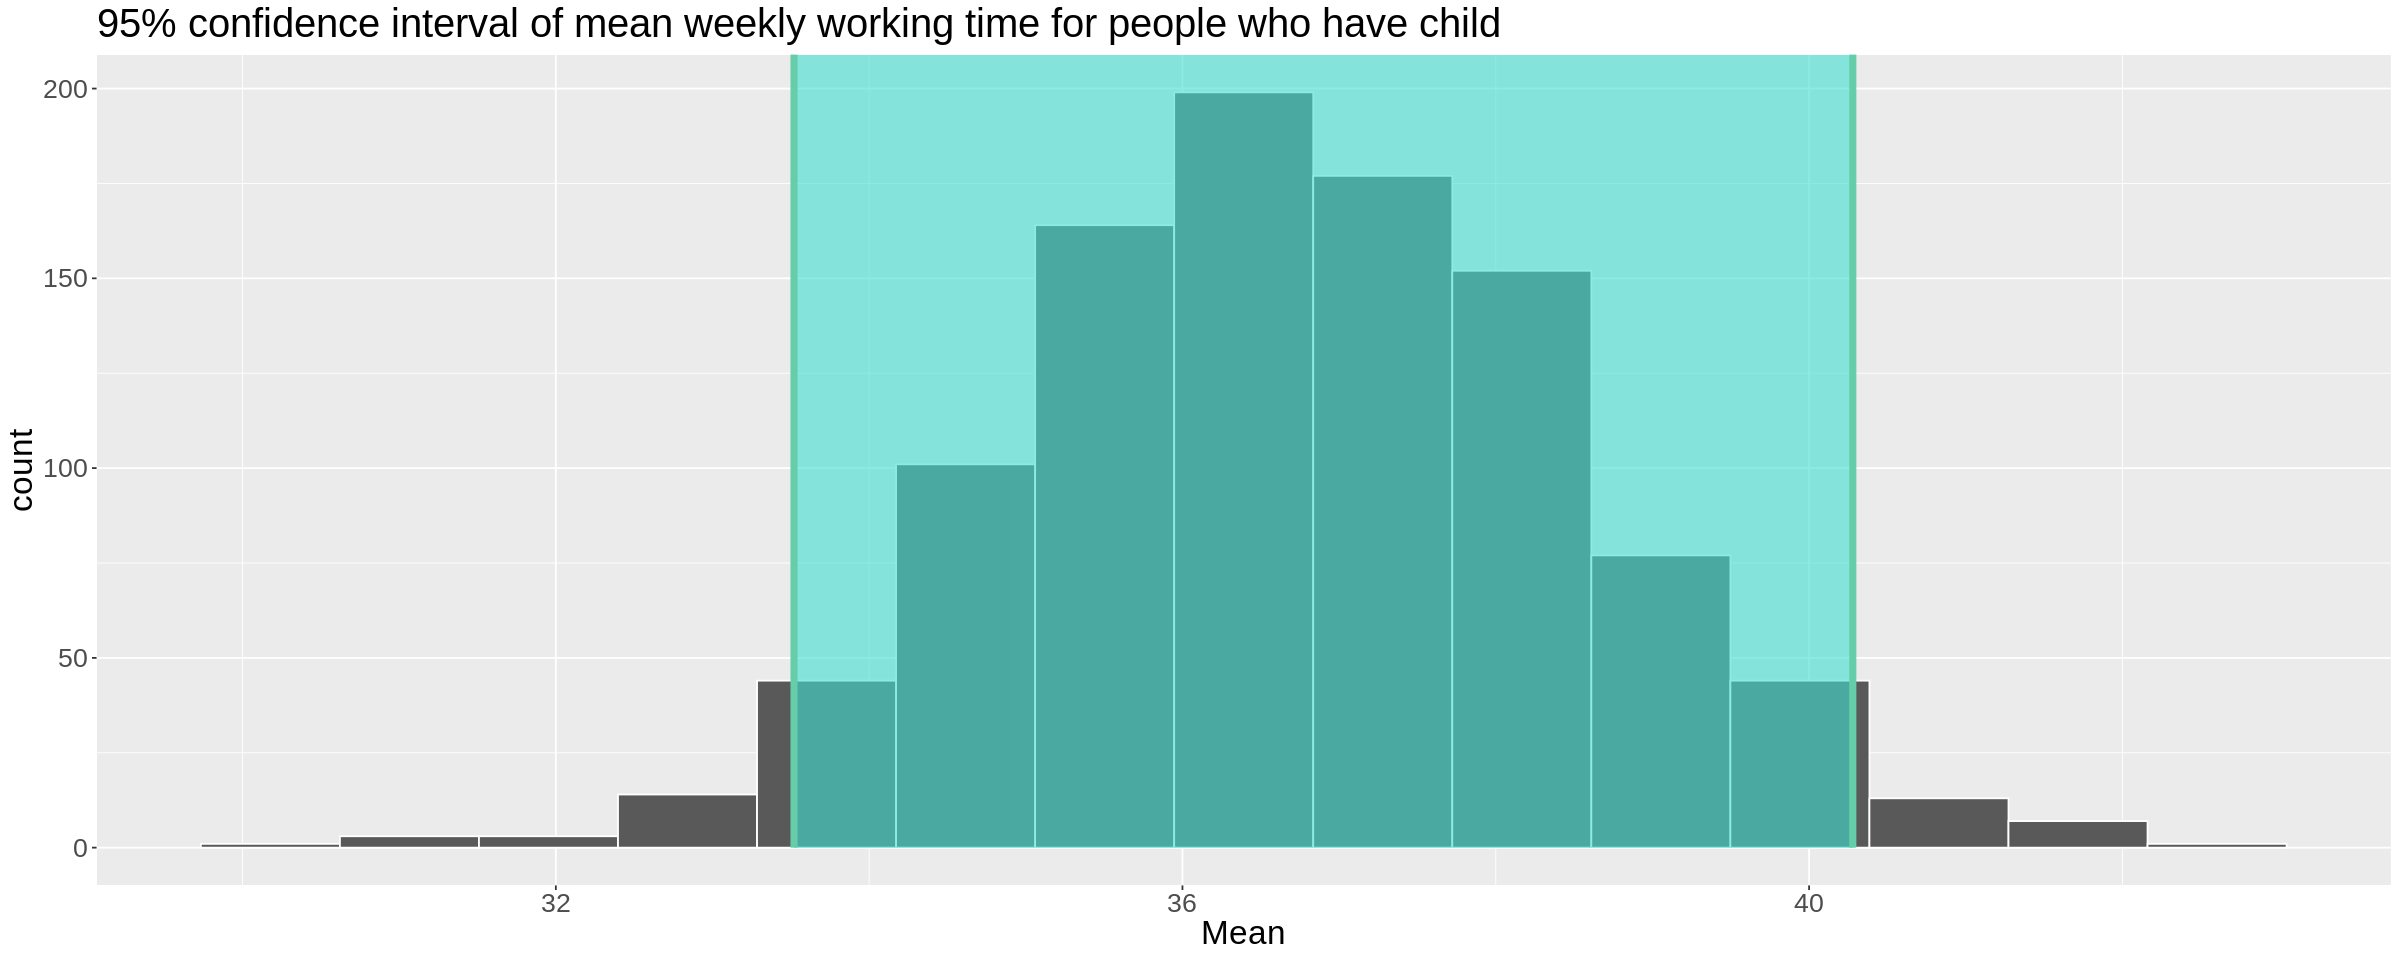

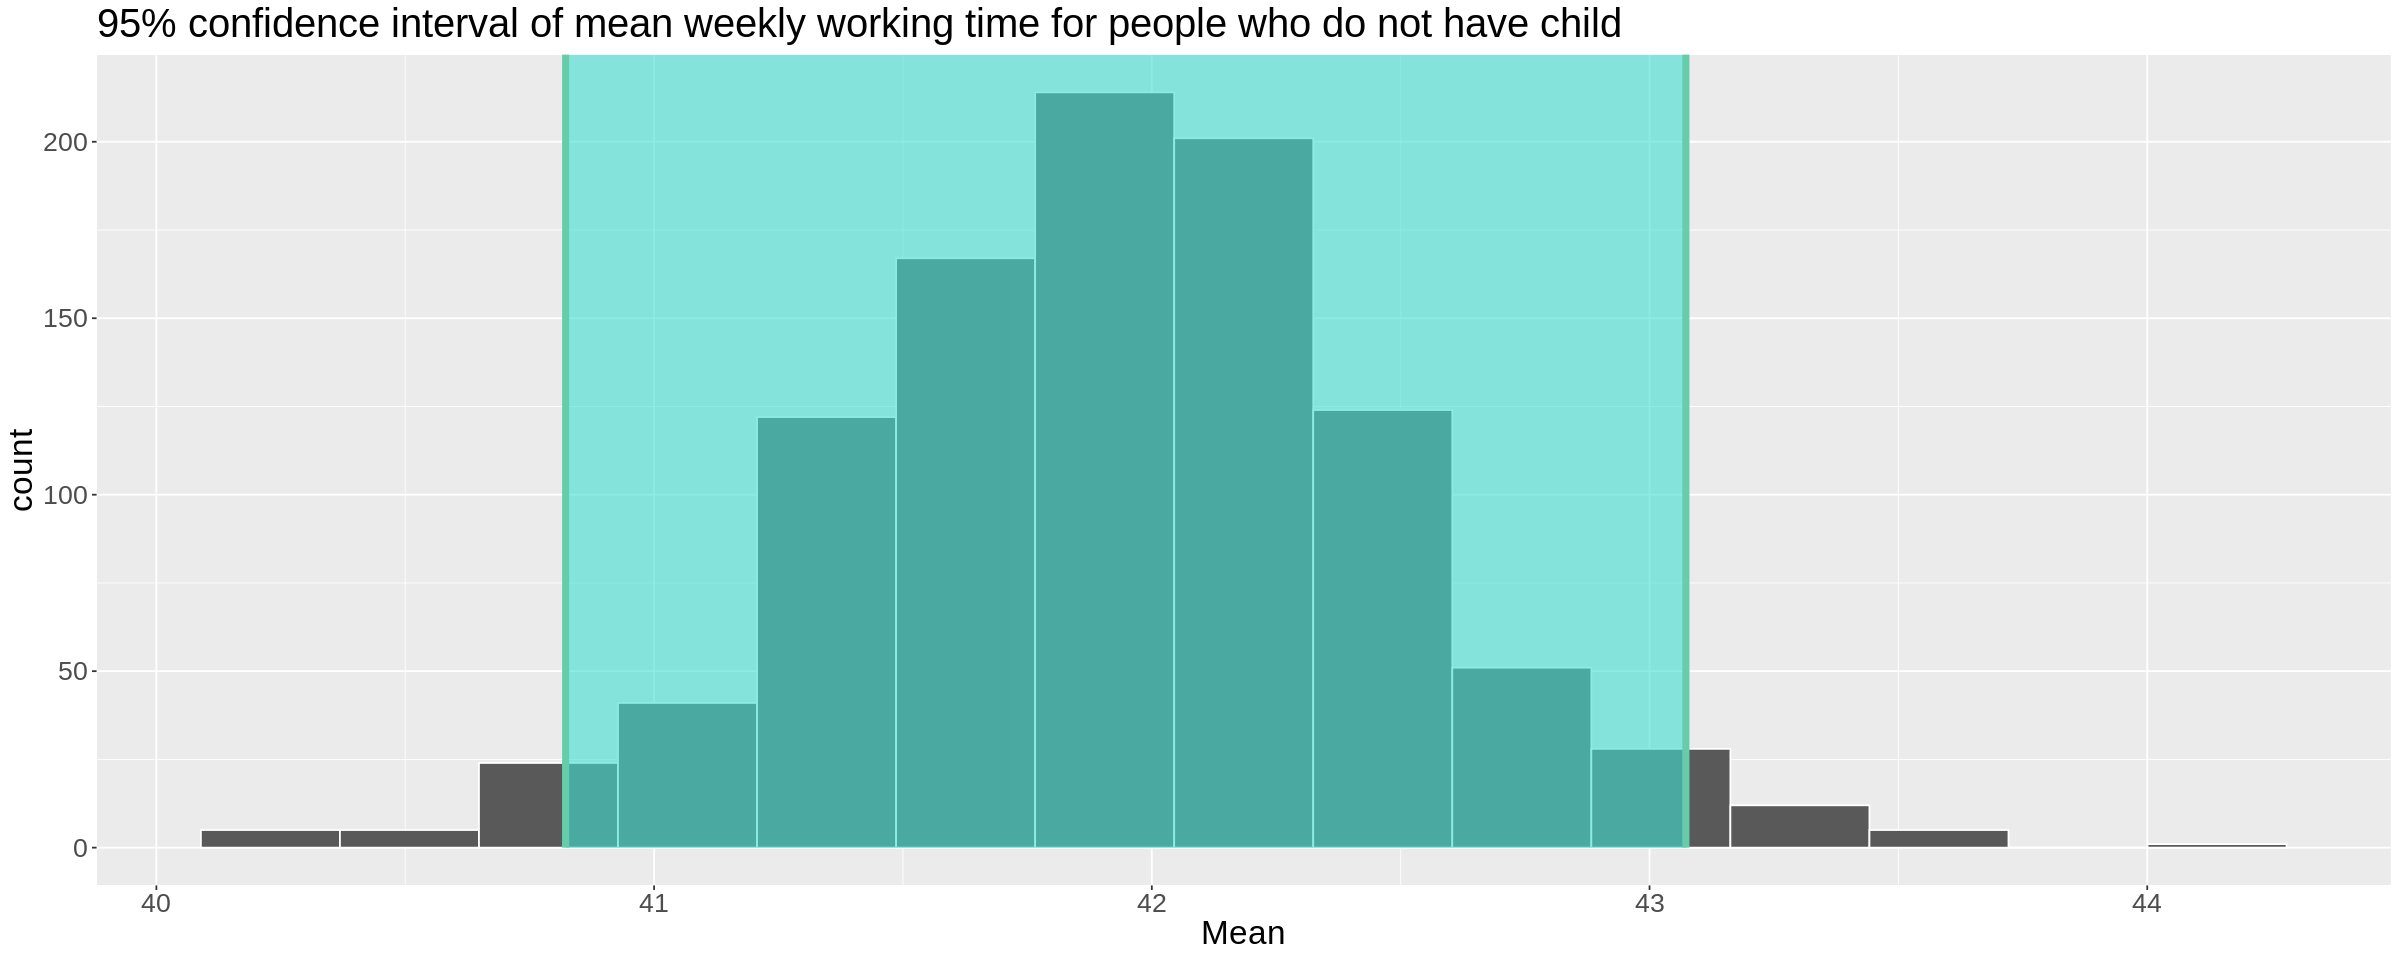

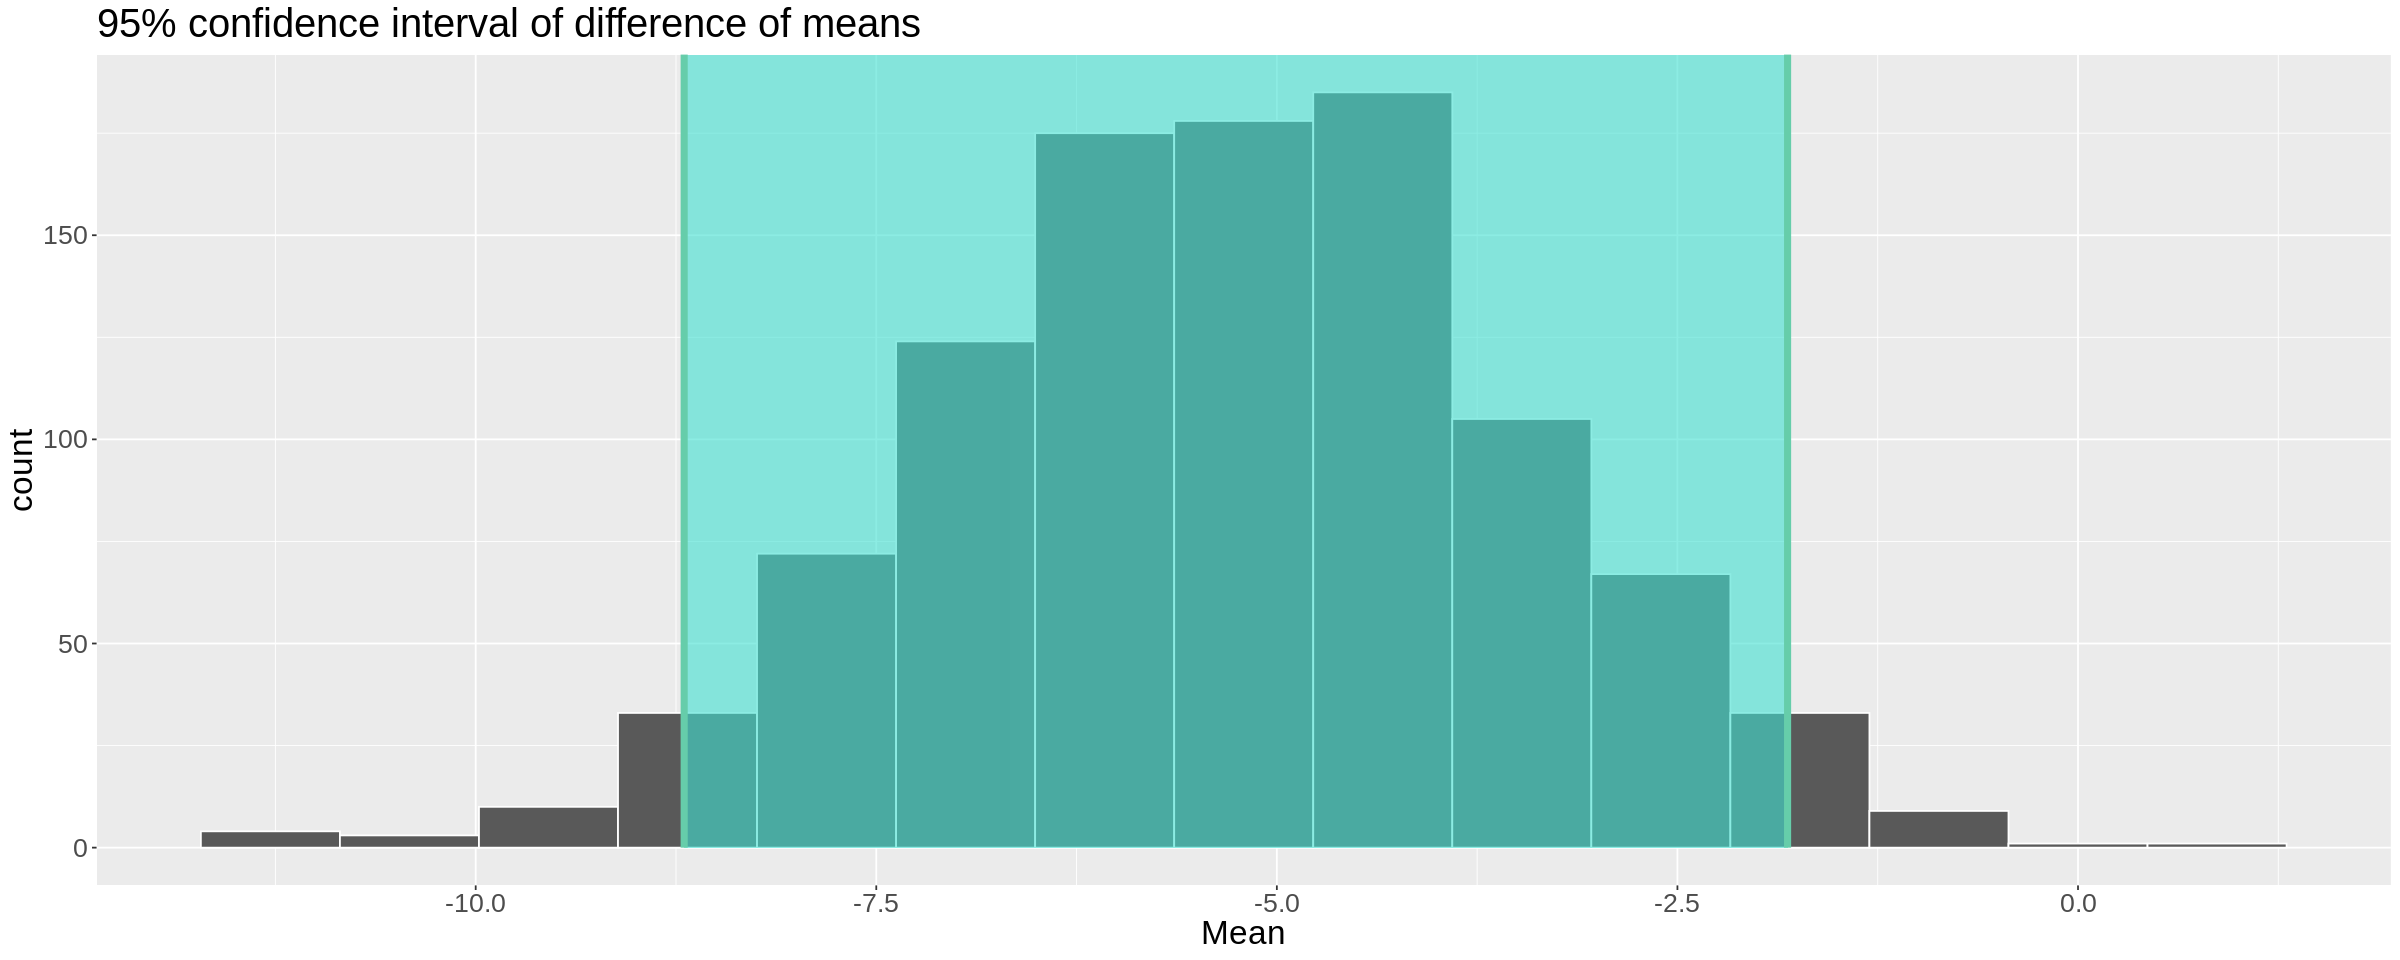

In [19]:
bootstrapping_with_child_plot <-
    bootstrapping_with_child %>%
    visualize() +
    shade_confidence_interval(endpoints = bootstrapping_with_child_ci) +
    theme(text = element_text(size = 20)) +
    xlab("Mean") +
    ggtitle("95% confidence interval of mean weekly working time for people who have child")

bootstrapping_with_child_plot

bootstrapping_without_child_plot <-
    bootstrapping_without_child %>%
    visualize() +
    shade_confidence_interval(endpoints = bootstrapping_without_child_ci) +
    theme(text = element_text(size = 20)) +
    xlab("Mean") +
    ggtitle("95% confidence interval of mean weekly working time for people who do not have child")

bootstrapping_without_child_plot

bootstrapping_diff_in_mean_plot <-
    bootstrapping_diff_in_mean %>%
    visualize() +
    shade_confidence_interval(endpoints = bootstrapping_diff_in_mean_ci) +
    theme(text = element_text(size = 20)) +
    xlab("Mean") +
    ggtitle("95% confidence interval of difference of means")

bootstrapping_diff_in_mean_plot

*Figure 1.9 visualization of 95% confidence interval to the bootstrap distribution with, without child and difference in means*

**What do you expect to find?**
- We hope to observe a strong relationship between having a child or not having a child with mean working hours.  
- We wish to observe no significant relationship in mean for working hours and race.
- We hope to find weak relationship, with barely no difference between sex and mean working hours.


**What impact could such findings have?**
- Through the examination between relationship and working hours, a company could determine whether they should hire a single person or someone with a child. 
- We wish to reject the hypothesis of the relationship between race and working hours, as race should not be a determining factor when companies decide to hire workers. 
- We also hope to prove that the sex will not be a major factor of working hours, eliminating this from companies’  recruiting restrictions and further emphasizing gender equality. 


**Future questions for students have interest towards our project:**
- Is there a correlation between working hours and work efficiency?
- Is there a direct relationship between income and working hours?
- Will people’s occupation level alter their working hours significantly? 
- Does Marital Status play an important rule in working hours? 

## References

**References**

Artazcoz, L., Cortès-Franch, I., Escribà-Agüir, V., López, M., & Benavides, F. G. (2018). Long working hours and job quality in europe: Gender and welfare state differences. *International Journal of Environmental Research and Public Health, 15*(11), 2592. https://doi.org/10.3390/ijerph15112592

Pencavel, J. H., & UPSO eCollections (University Press Scholarship Online). (2018). *Diminishing returns at work: The consequences of long working hours*. Oxford University Press. https://doi.org/10.1093/oso/9780190876166.001.0001



**References(Picture)**

[1] Register with your work email now to: The Employee Benefits & Engagement Platform - Vantage Circle. (n.d.). Retrieved July 26, 2022, from https://blog.vantagecircle.com/content/images/2019/07/flexible-working-time.png


**References(Databases)**

Kohavi, R., & Becker, B. (1996, May 1). Adult Data Set. Retrieved 2021, from https://archive.ics.uci.edu/ml/datasets/adult. The dataset was retrieved from: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository *Irvine, CA: University of California, School of Information and Computer Science*. http://archive.ics.uci.edu/ml]. 